**Задача 1.1.3. Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.**

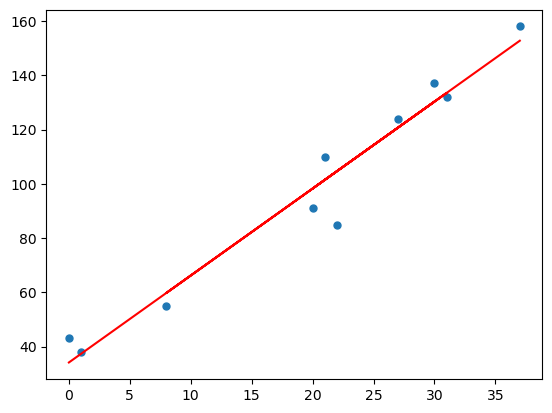

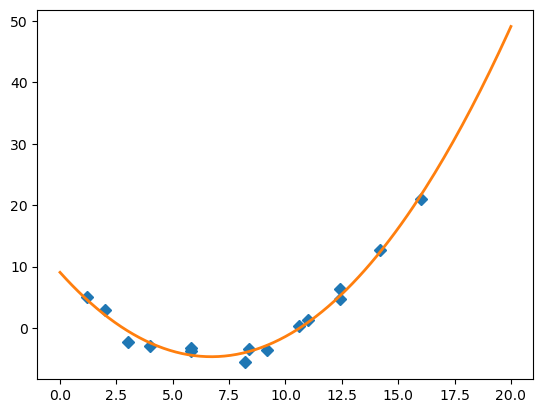

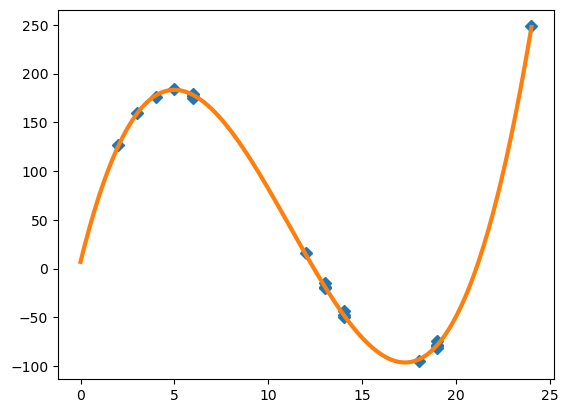

In [134]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gen_p1(ndots, e, a, b):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x+b + e*random.randint(0, 7) for x in x])
    return x, y

def gen_p2(ndots, e, a, b, c):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x**2 +b*x + c + e*random.randint(0, 7) for x in x])
    return x, y

def gen_p3(ndots, e, a, b, c, d):
    x = np.array([i + e*random.randint(0, 7) for i in range(ndots)])
    y = np.array([a*x**3 +b*x**2 + c*x + d + e*random.randint(0, 7) for x in x])
    return x, y

x, y = gen_p1(10, 4, 3, 19)

m1 = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(m1, y, rcond=None)[0]
plt.plot(x,y, 'o', label='initial data', markersize=5)
plt.plot(x, m*x + c, 'r', label='linear')
plt.show()

x, y = gen_p2(15, 0.4, 0.3, -4, 7)

m = np.vstack((x**2, x,np.ones(15))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = np.linspace(0,20,149)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**2 + s[1]*x_prec + s[2],'-',lw=2)
plt.show(

x, y = gen_p3(20, 1, 0.3, -10, 77, 8)

m = np.vstack((x**3,x**2, x,np.ones(len(x)))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]

x_prec = np.linspace(0,max(x),200)

plt.plot(x,y,'D')

plt.plot(x_prec,s[0] * x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=3)
plt.show()

**Задание 1.1.5. Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.**

[1.80211098 4.3160651 ]
0.02115526747701278
9.537401309973633


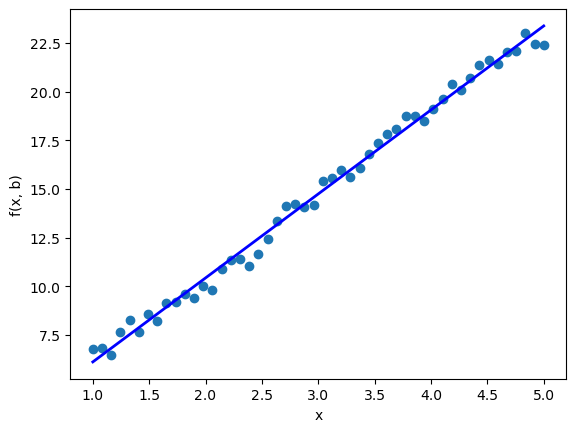

[2.26218293 4.11157907 1.29595233]
0.02955333645653478
3.806412499429296


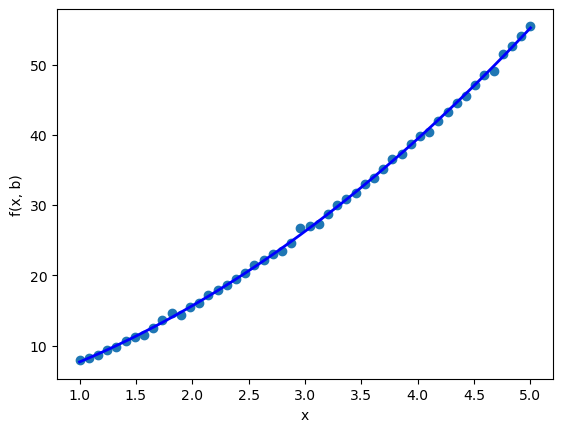

[1.78715075 4.53312027]
0.017165062512282156
39.69320185346704


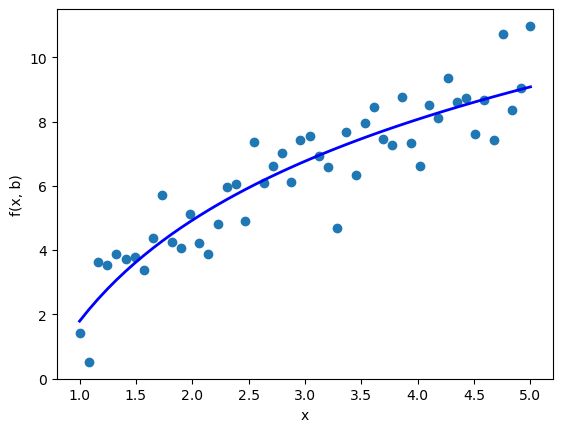

[2.00544019 4.29811144]
8.331521950976108e-06
19.70951922046431


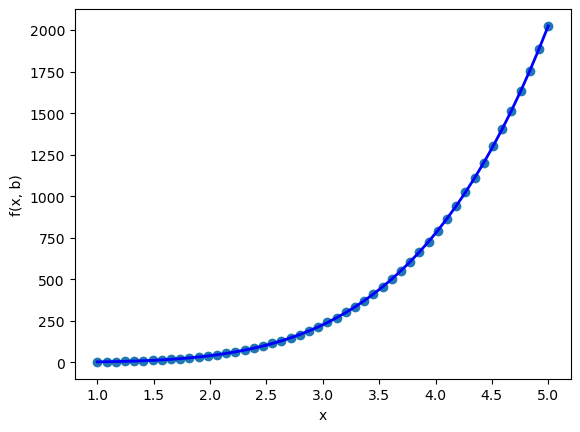

In [9]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

b_d = (2, 4.3)

def f1(x, b0, b1): # 1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
    return b0 + b1*x

def f2(x, b0, b1, b2): # 2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥
    return b0 + b1*x + b2*x**2

def f3(x, b0, b1): # 3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
    return b0 + b1*np.log(x)

def f4(x, b0, b1): # 4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥**b1
    return b0 * np.power(x,b1)

x_val = np.linspace(1, 5, 50)
y = f1(x_val, *b_d)
y_val = y + 0.48*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f1, x_val, y_val)
print(beta_opt)

lin_err = sum(beta_corv[0])
print(lin_err)
sq_err = sum((y_val - f1(x_val, *beta_opt))**2)
print(sq_err)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f1(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

y = f2(x_val, *(*b_d, 1.27))
y_val = y + 0.28*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f2, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f2(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f2(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

y = f3(x_val, *b_d)
y_val = y + 0.98*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f3, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f3(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f3(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

y = f4(x_val, *b_d)
y_val = y + 0.7*np.random.randn(len(x_val))
beta_opt, beta_corv = sc.optimize.curve_fit(f4, x_val, y_val)
print(beta_opt)

lin_dev = sum(beta_corv[0])
print(lin_dev)
residuals = y_val - f4(x_val, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val)
ax.plot(x_val, f4(x_val, *beta_opt), 'b', lw=2)
ax.set_xlabel("x")
ax.set_ylabel("f(x, b)")
plt.show()

**Задание 1.2.1. Постройте модель линейной регрессии для произвольных данных из двустолбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.**

26780.09915062818
[9312.57512673]


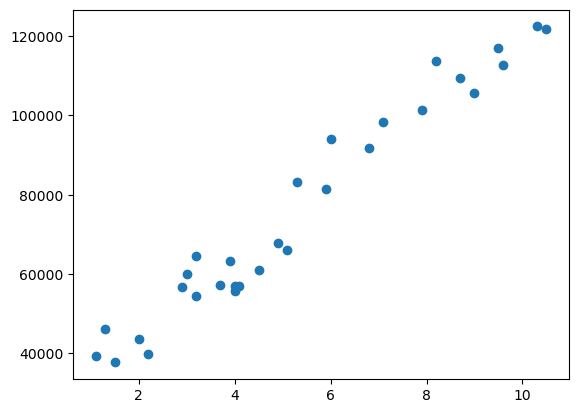

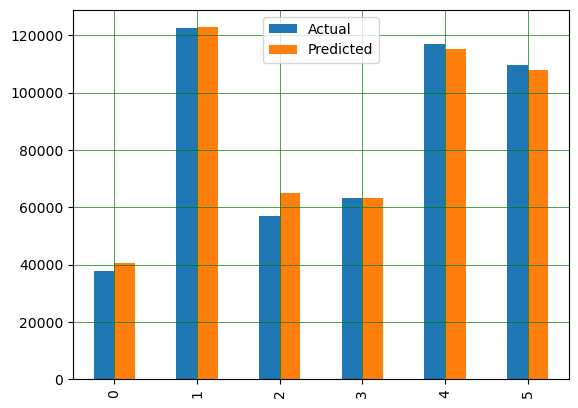

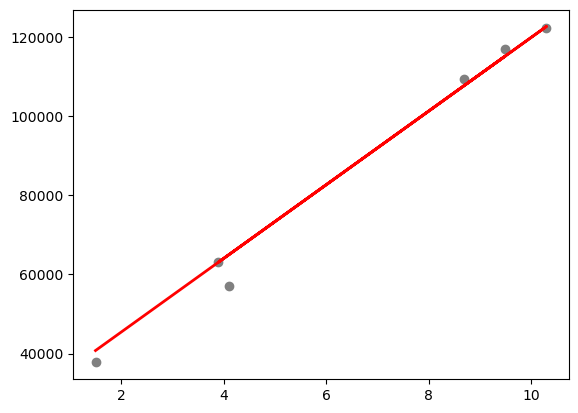

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
plt.scatter(data['YearsExperience'],data["Salary"])
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

y_pred = reg.predict(x_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

**Задача 1.3.2. Постройте модель множественной линейной регрессии для произвольных ланных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галонов) в 48 штатах США или набор данных о качетсве красного вина (1) и (2) соответственно. Найлите коэффициенты множественной регрессии. Постройте прогноз.**
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

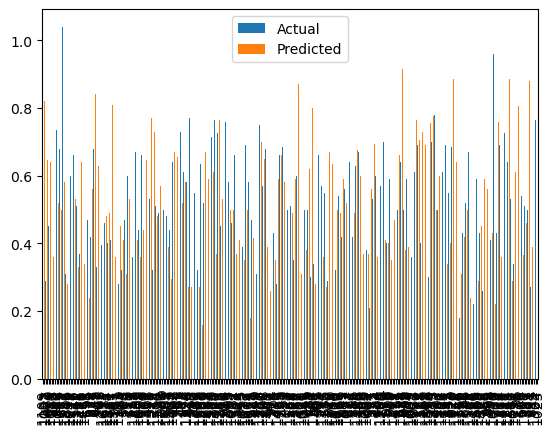

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data
data.describe()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data.iloc[:, 1], test_size=0.2,random_state=0)
regress = LinearRegression()
regress.fit(x_train,y_train)
coeff_df = pd.DataFrame(regress.coef_,data.iloc[:,:-1].columns,columns=['Coefficient'])
coeff_df

y_pred = regress.predict(x_test)
df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
df
df.plot(kind='bar')
plt.show()

**Задача со звездочкой (Вариант 7). Экспериментально получены N - значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.**

[1.  1.2 1.4 1.6 1.8 2. ] [2. 6. 4. 4. 2. 5.]
0.4285714285714295 3.190476190476191
-2.232142857142952 7.125000000000289 -1.5714285714287781


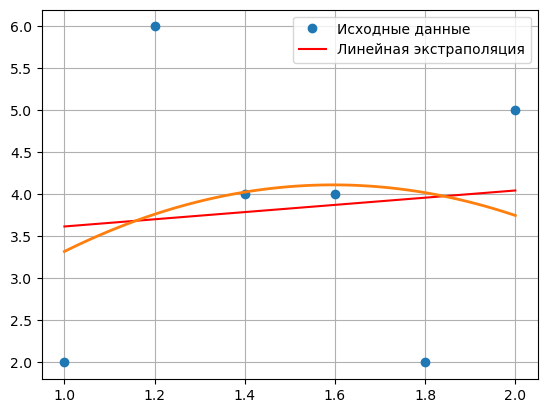

In [8]:
import numpy as np
from numpy import vstack,ones,linspace
import matplotlib.pyplot as plt

x = [1.0,1.2,1.4,1.6,1.8,2.0]
y = [2.0,6.0,4.0,4.0,2.0,5.0]

new_y = np.array(y)
new_x = np.array(x)
print(new_x,new_y)
A = np.vstack([new_x,np.ones(len(new_x))]).T
A
m,c = np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

plt.plot(new_x,new_y,'o',label='Исходные данные')
plt.plot(new_x,m*new_x+c,'r',label='Линейная экстраполяция')
plt.legend()

m = vstack([new_x**2,new_x,ones(len(new_x))]).T
s = np.linalg.lstsq(m,new_y,rcond=None)[0]
x_prec = linspace(1,2,100)

plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
print(s[0],s[1],s[2])